In [33]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("white")

In [2]:
df = pd.read_pickle("data/total_pageviews.pkl")
wiki = pd.read_pickle("data/granular_pageivews.pkl")

# Wiki pageview analysis

## Total daily pageviews

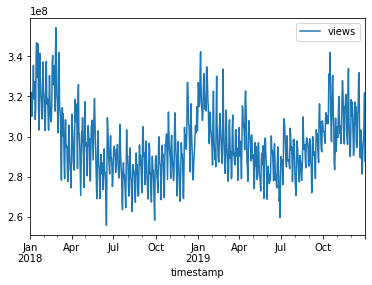

In [8]:
df[["timestamp", "views"]].set_index("timestamp").plot();

This is too detailed and noisy. 

## Total monthly pageviews

In [16]:
# truncate dates to months
df = df.assign(month_id=pd.to_datetime(df["timestamp"].dt.strftime("%Y-%m-01")))

In [24]:
df.groupby("month_id").agg({"views": "sum"}).head()

,views
month_id,
2018-01-01,10015272145
2018-02-01,9021649881
2018-03-01,9283433216
2018-04-01,8974420145
2018-05-01,9136114340


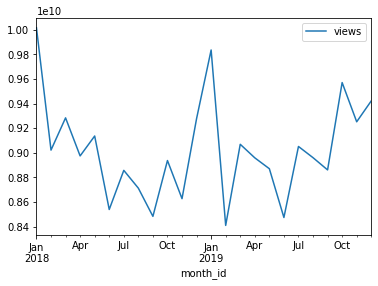

In [19]:
df.groupby("month_id").agg({"views": "sum"}).plot();

## Break down pageviews into access types

| month_id | access_type | views |
|----------|-------------|-------|
| 2018-01-01 | desktop | 12556136 |
| 2018-01-01 | mobile-app | 125666 |
| ... | ... | ... |

In [22]:
wiki.sort_values("timestamp").head(10)

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,user,daily,2018-01-01,103246409
0,en.wikipedia,mobile-web,spider,daily,2018-01-01,2861956
0,en.wikipedia,mobile-app,user,daily,2018-01-01,5088222
0,en.wikipedia,mobile-web,user,daily,2018-01-01,145670264
0,en.wikipedia,desktop,spider,daily,2018-01-01,45961479
1,en.wikipedia,mobile-app,user,daily,2018-01-02,4432086
1,en.wikipedia,mobile-web,user,daily,2018-01-02,135305506
0,en.wikipedia,mobile-app,spider,daily,2018-01-02,2
1,en.wikipedia,mobile-web,spider,daily,2018-01-02,2798770
1,en.wikipedia,desktop,user,daily,2018-01-02,132232882


In [27]:
wiki = wiki.assign(month_id=pd.to_datetime(wiki["timestamp"].dt.strftime("%Y-%m-01")))

In [32]:
mthl_access_views = wiki.groupby(["month_id", "access"]).agg({"views": "sum"}).reset_index()

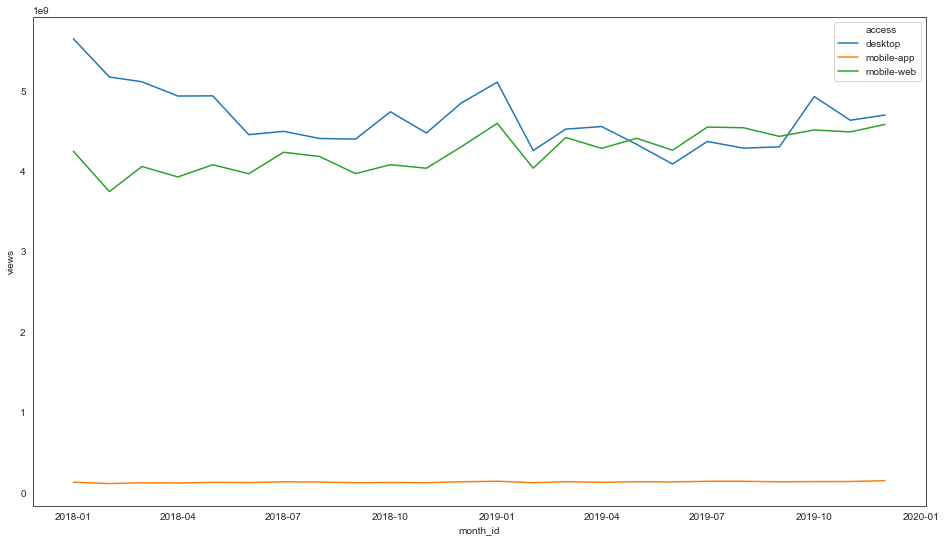

In [35]:
fig, ax = plt.subplots(figsize=(16,9))

sns.lineplot(data=mthl_access_views,
             x="month_id",
             y="views",
             hue="access",
             ax=ax);

## Break down by agent types

In [36]:
mthl_agent_views = wiki.groupby(["month_id", "agent"]).agg({"views": "sum"}).reset_index()

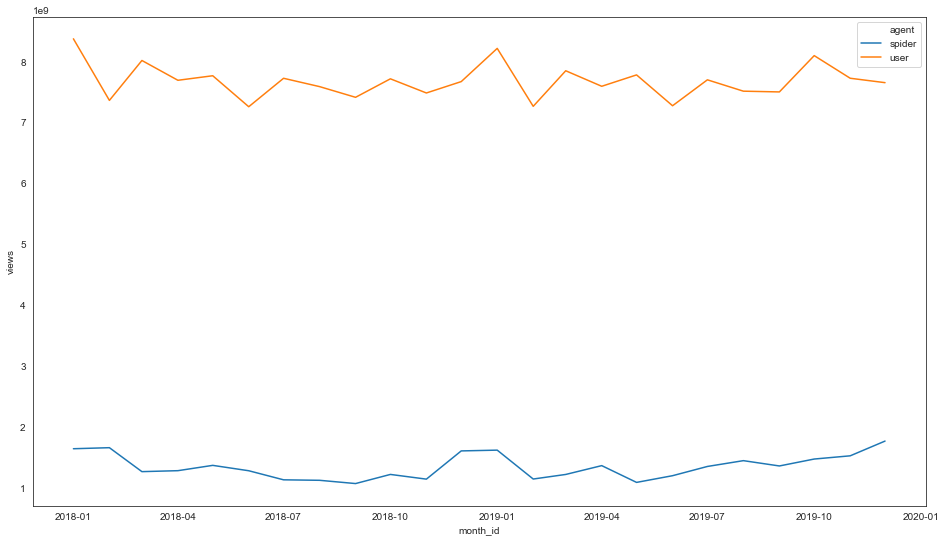

In [38]:
fig, ax = plt.subplots(figsize=(16,9))

sns.lineplot(data=mthl_agent_views,
             x="month_id",
             y="views",
             hue="agent",
             ax=ax);